<a href="https://colab.research.google.com/github/MachukaJoy/autoencoders_clothes_design/blob/main/autoencoders_clothes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas
import numpy
import torch
from torchvision import transforms, datasets

In [4]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [5]:
# Check if GPU is available and use it if possible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [6]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 26.4M/26.4M [00:02<00:00, 8.95MB/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.73MB/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 19.5MB/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



In [7]:
# Define various architectures
class ShallowAE(nn.Module):
    def __init__(self):
        super(ShallowAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [8]:
class DeepAE(nn.Module):
    def __init__(self):
        super(DeepAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [9]:
class CustomAE(nn.Module):
    def __init__(self):
        super(CustomAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [10]:
# Train Function
def train_autoencoder(model, trainloader, epochs=20, lr=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = []

    for epoch in range(epochs):
        running_loss = 0
        for images, _ in trainloader:
            images = images.view(images.size(0), -1)  # Flatten images
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, images)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(trainloader)
        losses.append(avg_loss)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

    return losses

In [11]:
# Plot Loss
def plot_loss(losses, title):
    plt.plot(losses)
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()


In [12]:
# Initialize and train models
shallow_ae = ShallowAE()
deep_ae = DeepAE()
custom_ae = CustomAE()

Epoch 1, Loss: 0.6117
Epoch 2, Loss: 0.5898
Epoch 3, Loss: 0.5857
Epoch 4, Loss: 0.5836
Epoch 5, Loss: 0.5825


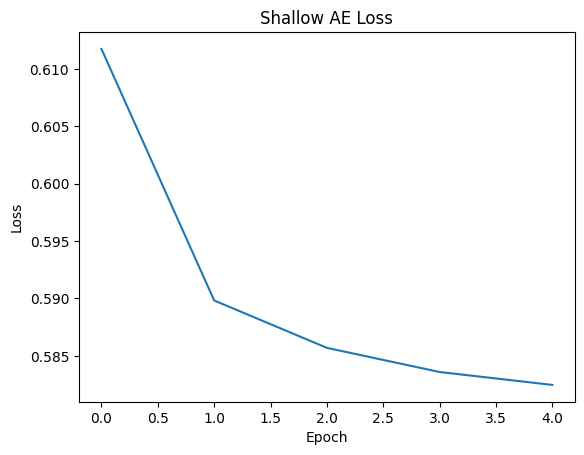

Epoch 1, Loss: 0.6192
Epoch 2, Loss: 0.5961
Epoch 3, Loss: 0.5920
Epoch 4, Loss: 0.5896
Epoch 5, Loss: 0.5882


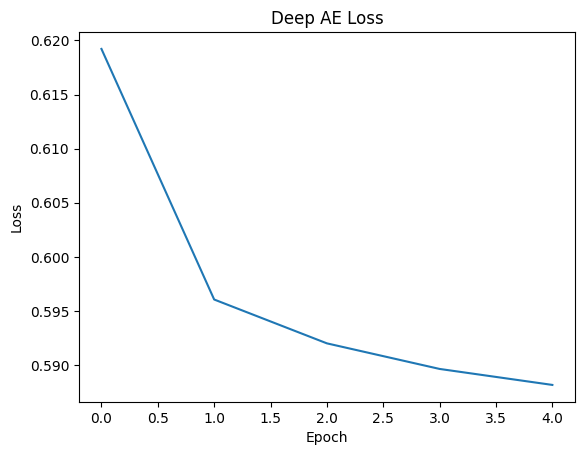

Epoch 1, Loss: 0.6221
Epoch 2, Loss: 0.5997
Epoch 3, Loss: 0.5965
Epoch 4, Loss: 0.5947
Epoch 5, Loss: 0.5936


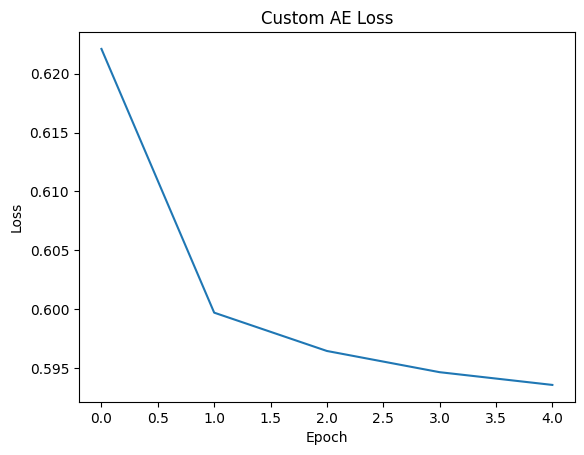

In [13]:
# training process
shallow_loss = train_autoencoder(shallow_ae, trainloader, epochs=5)
plot_loss(shallow_loss, "Shallow AE Loss")

deep_loss = train_autoencoder(deep_ae, trainloader, epochs=5)
plot_loss(deep_loss, "Deep AE Loss")

custom_loss = train_autoencoder(custom_ae, trainloader, epochs=5)
plot_loss(custom_loss, "Custom AE Loss")

The shallow Autoencoder appears to have a lower loss on the fifth epoc hence performing slightly better than the rest.
We will therefore train it with more epochs to see it perform better.